In [ ]:
using Pkg
Pkg.activate("../")
using CairoMakie
using Random
using Distributions
using StatsBase
using LinearAlgebra
using DSP

  Activating project at `~/git/projects/perspective_heart_and_brain`


In [ ]:
# import data from matlab file format
using MAT
filename="/Users/johannes/Downloads/subject_00.mat"
vars = matread(filename)
data = vars["SIGNAL"]
time = data[:,1];
electrodes = data[:,2:17];
triggers = data[:,18:19];
sum(triggers[:,1]), sum(triggers[:,2])

(5.0, 5.0)

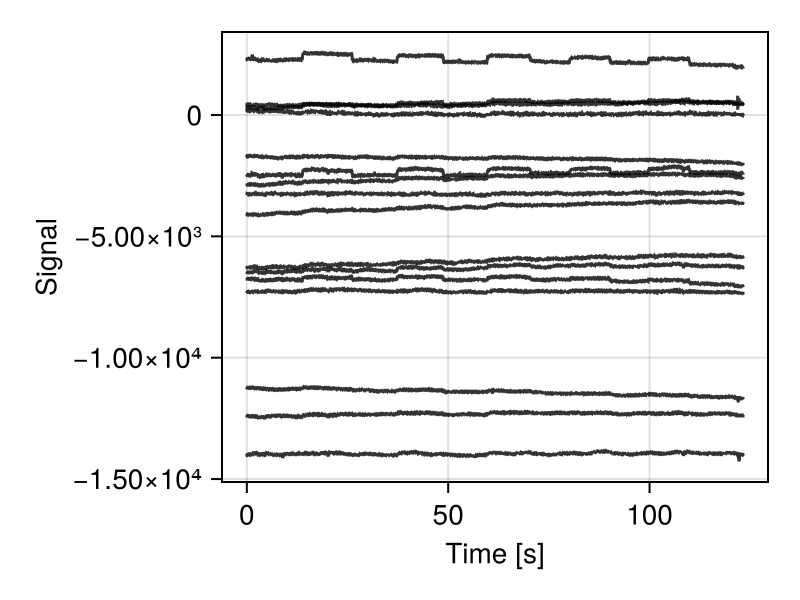

In [ ]:
# plot the data
fig = Figure(size = (400, 300))
ax = Axis(fig[1, 1], xlabel = "Time [s]", ylabel = "Signal")
for i in 1:size(electrodes)[2]
    lines!(ax, time, electrodes[:,i], color = (:black, 0.8))
end
fig

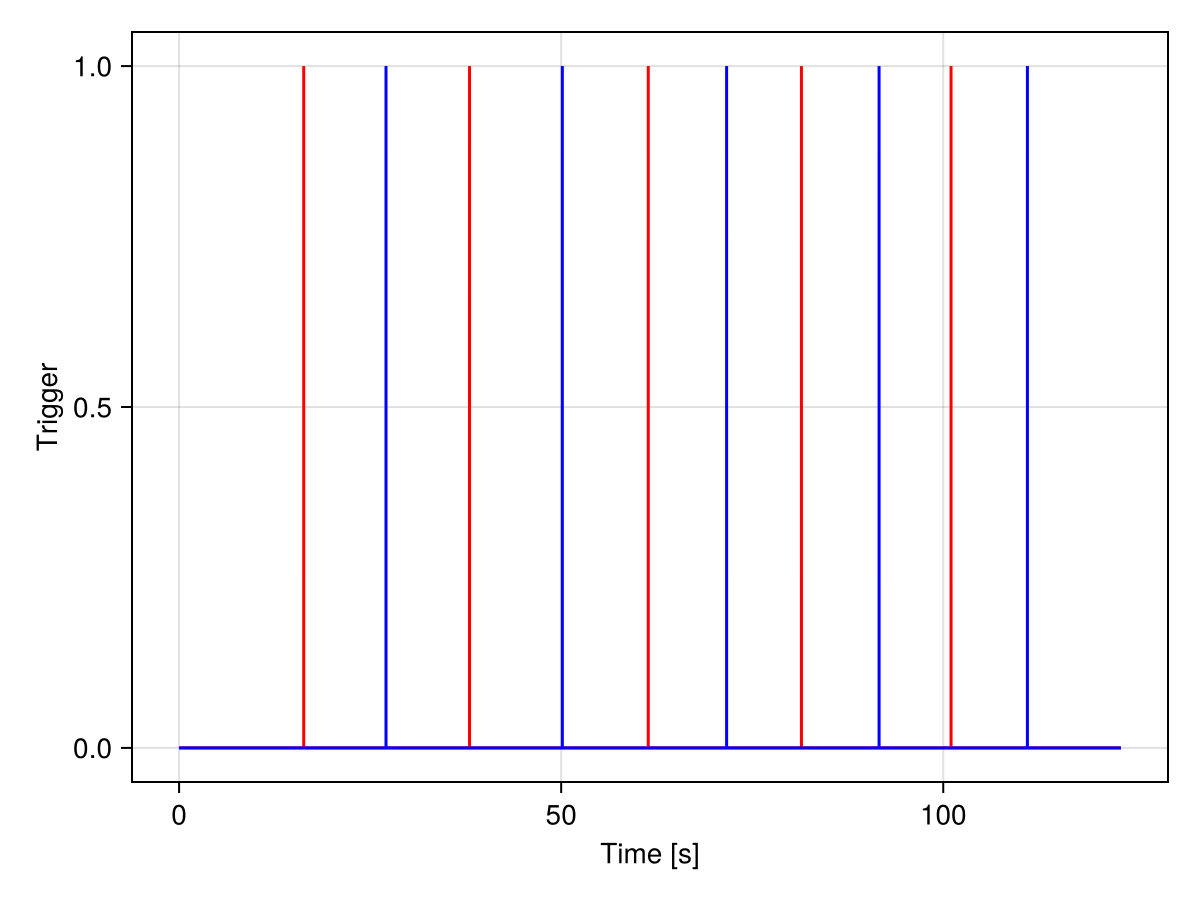

In [ ]:
# plot triggers
fig = Figure()
ax = Axis(fig[1, 1], xlabel = "Time [s]", ylabel = "Trigger")
lines!(ax, time, triggers[:,1], color = :red)
lines!(ax, time, triggers[:,2], color = :blue)
fig

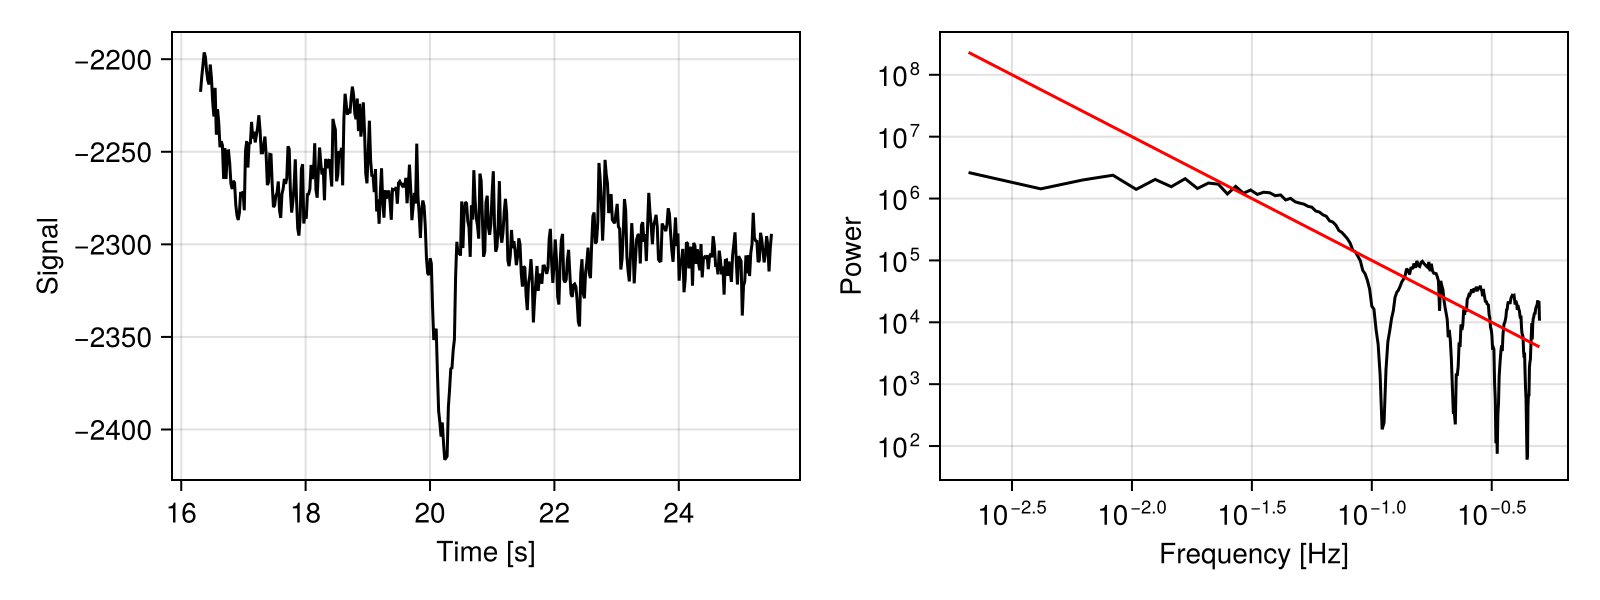

In [ ]:
fig = Figure(size = (800, 300))
ax = Axis(fig[1, 1], xlabel = "Time [s]", ylabel = "Signal")
sample = electrodes[:, 2]
idx_trigger_1 = findfirst(triggers[:,1] .> 0)
idx_trigger_2 = findfirst(triggers[:,2] .> 0)
t = time[idx_trigger_1:idx_trigger_2]
s = sample[idx_trigger_1:idx_trigger_2]
mask = t .< 25.5
# mask = time .> 0
t = t[mask][1:10:end]
s = s[mask][1:10:end]
lines!(ax, t, s, color = :black)
# psd
pxx = periodogram(s)
ax2 = Axis(fig[1, 2], xlabel = "Frequency [Hz]", ylabel = "Power", yscale=log10, xscale=log10)
mf = pxx.freq .> 0
lines!(ax2, pxx.freq[mf], pxx.power[mf], color = :black)
lines!(ax2, pxx.freq[mf], 1000 ./ pxx.freq[mf] .^ 2, color = :red)  
fig

0.10292843912548705


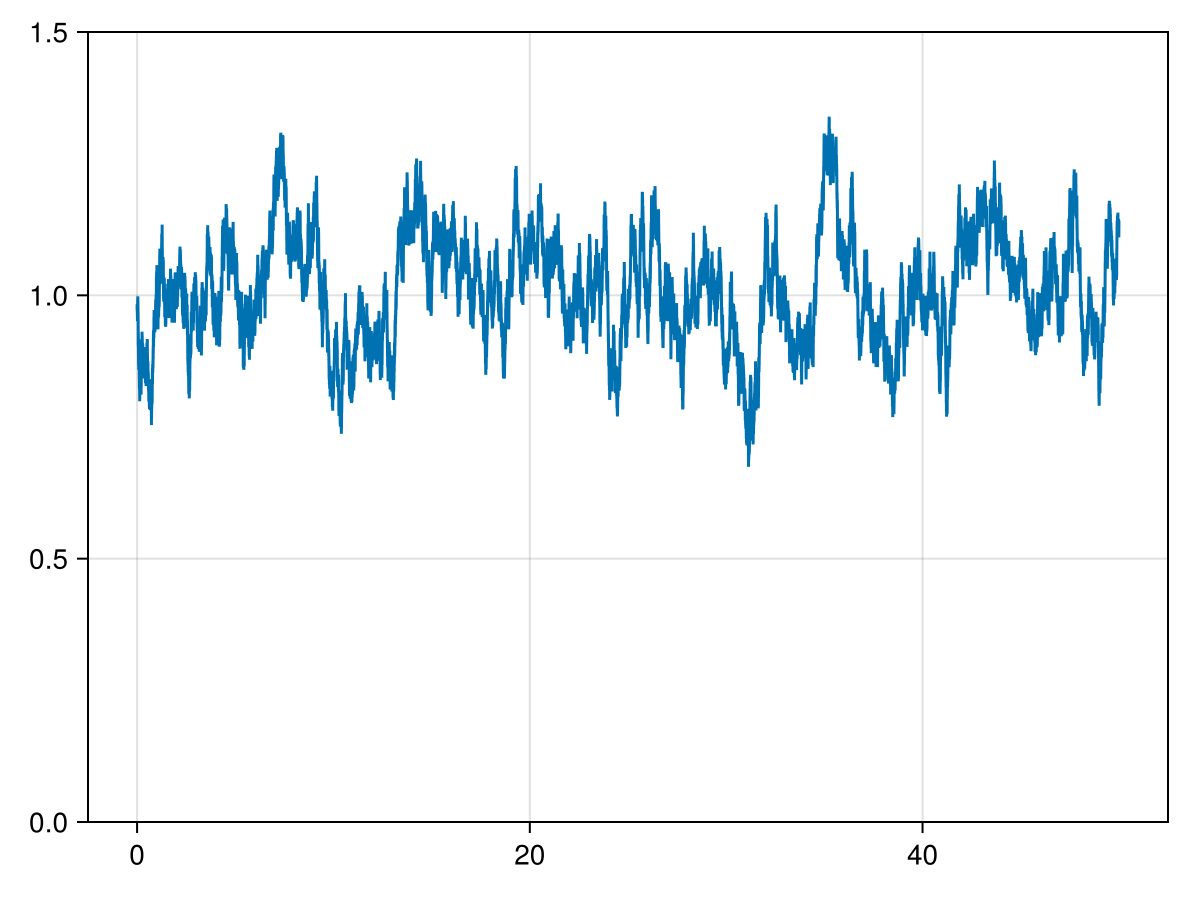

In [ ]:
N = 100
# time-dependent rate of population (population AR process with correlation should be the same as OU...)
rate_μ = 1   # Hz
rate_σ = 0.1 # Hz
τ = 0.5   # s
dt = 1e-4 # s
t = 0:dt:50
# ornstein uhlenbeck process for the rate
rate = zeros(length(t))
rate[1] = rate_μ + rate_σ * randn()
for i in 2:length(rate)
    rate[i] = rate[i-1] + (rate_μ - rate[i-1]) * dt / τ + rate_σ * sqrt(2 * dt / τ) * randn()
end
# print std of rate
println(std(rate))
# quick plot to show the outcome
fig = Figure()
ax = Axis(fig[1, 1])
lines!(ax, t, rate)
# y axis range
ylims!(ax, 0, 1.5)
fig